## 5. Computer Vision Algoritm
- 2001: Viola-Jones: Face detection
- 2005: Histogram of Oriented Gradients (HOG): Face detection
- 2012: CNNs : Objection Detection
- 2015: R-CNNs, Fast-CNNs, SSD and YOLO (came with other helper methods, selective search) : Object Detection

## Bilinear Interpolation

In [6]:
import numpy as np
import math

# ref: https://meghal-darji.medium.com/implementing-bilinear-interpolation-for-image-resizing-357cbb2c2722

def bl_resize(original_img, new_h, new_w):
	#get dimensions of original image
	old_h, old_w, c = original_img.shape
	#create an array of the desired shape. 
	#We will fill-in the values later.
	resized = np.zeros((new_h, new_w, c))
	#Calculate horizontal and vertical scaling factor
	w_scale_factor = (old_w ) / (new_w ) if new_h != 0 else 0
	h_scale_factor = (old_h ) / (new_h ) if new_w != 0 else 0
	for i in range(new_h):
		for j in range(new_w):
			#map the coordinates back to the original image
			x = i * h_scale_factor
			y = j * w_scale_factor
			#calculate the coordinate values for 4 surrounding pixels.
			x_floor = math.floor(x)
			x_ceil = min( old_h - 1, math.ceil(x))
			y_floor = math.floor(y)
			y_ceil = min(old_w - 1, math.ceil(y))

			if (x_ceil == x_floor) and (y_ceil == y_floor):  # avoid black grid
				# both x and y are integers, it means that the coordinates of a pixel in the resized image
                # coincide with a particular pixel of the original image.
				q = original_img[int(x), int(y), :]
			elif (x_ceil == x_floor):
				# x is an integer, perform a linear interpolation on y
				q1 = original_img[int(x), int(y_floor), :]
				q2 = original_img[int(x), int(y_ceil), :]
				q = q1 * (y_ceil - y) + q2 * (y - y_floor)
			elif (y_ceil == y_floor):
				# y is an integer, perform a linear interpolation on x
				q1 = original_img[int(x_floor), int(y), :]
				q2 = original_img[int(x_ceil), int(y), :]
				q = (q1 * (x_ceil - x)) + (q2	 * (x - x_floor))
			else:
				v1 = original_img[x_floor, y_floor, :]
				v2 = original_img[x_ceil, y_floor, :]
				v3 = original_img[x_floor, y_ceil, :]
				v4 = original_img[x_ceil, y_ceil, :]

				q1 = v1 * (x_ceil - x) + v2 * (x - x_floor)
				q2 = v3 * (x_ceil - x) + v4 * (x - x_floor)
				q = q1 * (y_ceil - y) + q2 * (y - y_floor)

			resized[i,j,:] = q
	return resized.astype(np.uint8)

In [12]:
import cv2

image = cv2.imread('DataCV/camus.jpg')
print(image.shape[0]/2)
resize = bl_resize(image, int(image.shape[0]*2), int(image.shape[1]*2))

cv2.imshow('Computer Vision', resize)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)  # for Mac

272.5


-1

### 38. Handling Images and Pixels
#### 38.1. Handling Pixel Intensities I

In [4]:
import cv2

image = cv2.imread('DataCV/camus.jpg', cv2.IMREAD_GRAYSCALE)

# values close to 0: darker pixels
# values closer to 255: brighter pixels
print(image.shape)
print(image)

cv2.imshow('Computer Vision', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)  # for Mac

(545, 800)
[[105 106 102 ... 202 205 208]
 [104 108 106 ... 196 198 199]
 [ 95 101 103 ... 195 195 195]
 ...
 [ 47  46  46 ... 138 136 133]
 [ 43  43  44 ... 138 135 131]
 [ 43  44  48 ... 137 134 131]]


-1

#### 38.2. Handling Pixel Intensities II

In [12]:
import cv2
import numpy as np

image = cv2.imread('DataCV/bird.jpg', cv2.IMREAD_COLOR)

print(image.shape)
#print(image)

print(np.amax(image))
print(np.amin(image))


cv2.imshow('Computer Vision', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)  # for Mac 

AttributeError: 'NoneType' object has no attribute 'shape'

### In image processing Convolution is
####  - the process of adding each element of the image to its local neigbors - weighted by the kernel


#### 38.3. Image processing - blur operation
- Gaussian Blur is used to reduce noise.

In [5]:
import numpy as np
import cv2

original_image = cv2.imread('DataCV/bird.jpg', cv2.IMREAD_COLOR)

blur_kernel_3x3 = np.ones((3, 3)) / 9
blur_kernel_5x5 = np.ones((5, 5)) / 25
print(blur_kernel_3x3)
print(blur_kernel_5x5)

# -1 "destination depth": -1 means the result image depth is same as the original image
blur_image_3x3 = cv2.filter2D(original_image, -1, blur_kernel_3x3)
blur_image_5x5 = cv2.filter2D(original_image, -1, blur_kernel_5x5)

cv2.imshow('Original Image', original_image)
cv2.imshow('Blurred_3x3 Image', blur_image_3x3)
cv2.imshow('Blurred_5x5 Image', blur_image_5x5)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)  # for Mac

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


#### 38.4. Image processing - edge detection

In [9]:
import numpy as np
import cv2

original_image = cv2.imread('DataCV/bird.jpg', cv2.IMREAD_COLOR)

# we have to transform the image into grayscale
# OpenCV handles BGR instead of RGB
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

result_image = cv2.Laplacian(gray_image, -1)
# 0  1  0
# 1 -4  1
# 0  1  0

laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
result_image_manual = cv2.filter2D(gray_image, -1, laplacian_kernel)

cv2.imshow('Original Image', gray_image)
cv2.imshow('EdgeDetected Image', result_image)
cv2.imshow('ManualKernel Image', result_image_manual)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)  # for Mac

#### 38.5. Image processing - sharpen operation
  - face recognition and we have a blurry CCTV video then we can apply this kernel in order to increase the precision of the underlying model

In [12]:
import numpy as np
import cv2

original_image = cv2.imread('DataCV/unsharp_bird.jpg', cv2.IMREAD_COLOR)

kernel5 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # default
kernel9 = np.array([[0, -1, 0], [-1, 9, -1], [0, -1, 0]])

sharpen_image5 = cv2.filter2D(original_image, -1, kernel5)
sharpen_image9 = cv2.filter2D(original_image, -1, kernel9)

cv2.imshow('Original Image', original_image)
cv2.imshow('Sharpen5 Image', sharpen_image5)
cv2.imshow('Sharpen9 Image', sharpen_image9)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)  # for Mac

### 39. Computer Vision Project I - Lane Detection

In [1]:
import cv2
import numpy as np


def draw_the_lines(image, lines):
    # create a distinct image for the lines [0,255] - all 0 values means black image
    lines_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

    # there are (x,y) for the starting and end points of the lines
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(lines_image, (x1, y1), (x2, y2), (255, 0, 0), thickness=3)

    # finally we have to merge the image with the lines
    image_with_lines = cv2.addWeighted(image, 0.8, lines_image, 1, 0.0)

    return image_with_lines


def region_of_interest(image, region_points):
    # we are going to replace pixels with 0 (black) - the regions we are not interested
    mask = np.zeros_like(image)

    # the region that we are interested in is the lower triangle - 255 white pixels
    cv2.fillPoly(mask, region_points, 255)

    # we have to use the mask: we want to keep the regions of the original image where
    # the mask has white colored pixels
    masked_image = cv2.bitwise_and(image, mask)

    return masked_image


def get_detected_lanes(image):
    (height, width) = (image.shape[0], image.shape[1])

    # we have to turn the image into grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # edge detection kernel (Canny's algorithm)
    canny_image = cv2.Canny(gray_image, 100, 120)

    # we are interested in the "lower region" of the image (there are the driving lanes)
    region_of_interest_vertices = [
        (0, height),
        (width / 2, height * 0.65),
        (width, height)
    ]

    # we can get rid of the un-relevant part of the image
    # we just keep the lower triangle region
    cropped_image = region_of_interest(canny_image, np.array([region_of_interest_vertices], np.int32))

    # use the line detection algorithm (radians instead of degrees: 1 degree = pi / 180)
    # rho & theta set the resolution of the algorithm
    lines = cv2.HoughLinesP(cropped_image, rho=2, theta=np.pi / 180, threshold=50, lines=np.array([]),
                            minLineLength=40, maxLineGap=150)

    # draw the lines on the image
    image_with_lines = draw_the_lines(image, lines)

    return image_with_lines


In [2]:
# video = several frames (images shown after each other)
video = cv2.VideoCapture('DataCV/lane_detection_video.mp4')

while video.isOpened():

    is_grabbed, frame = video.read()

    # because the end of the video
    if not is_grabbed:
        break

    frame = get_detected_lanes(frame)

    cv2.imshow('Lane Detection Video', frame)
    cv2.waitKey(20)  # add some delay

video.release()
cv2.destroyAllWindows()
cv2.waitKey(1)  # for Mac

### Hough Line Transform (Hough Algorithm) for line detection

ref: https://docs.opencv.org/4.x/d6/d10/tutorial_py_houghlines.html

https://github.com/jstar0525/MachineVision/tree/main/09%20Hough%20transform

## 41. Face Detection with Viola-Jones Method Implementation

In [4]:
import cv2


# PARAMETERS FOR FACE DETECTION 
# 
#  cascadeClassifier.detectMultiScale(image, faceDetections, scaleFactor, minNeighbors, flags, minSize, maxSize)
#
# 1.) scaleFactor: Since some faces may be closer to the camera, they would appear bigger
# 		 than other faces in the background -> the scale factor compensates for this
#			
#			Specifying how much the image size is reduced at each image scale
# 			
# 			The model has a fixed size defined during training: in the haarcascade_frontalface_alt.xml file !!!
# 			By rescaling the input image, you can resize a larger face to a smaller one,
# 				 making it detectable by the algorithm
# 
# 		Value: 1.1 - 1.4
# 			Small -> algorithm will be slow since it is more thorough
# 			High -> faster detection with the risk of missing some faces altogether
# 
#  2.) minNeighbors: specifying how many neighbors each candidate rectangle should have to retain it
#  			Value interval: ~ 3-6
#  				Higher values -> less detections but with higher quality !!!
#  
#  3.) flags: kind of a heuristic
#  		Reject some image regions that contain too few or too much edges
#  			 and thus can not contain the searched object
#  
#  4.) minSize: objects smaller than that are ignored !!!
#  			We can specify what is the smallest object we want to recognize 
#  					[30x30] is the standard
#  
#  5.) maxSize: objects larger than that are ignored !!!
 

cascadeClassifierPath = 'DataCV/haarcascade_frontalface_alt.xml'  # Trained Boosting Model
cascadeClassifier = cv2.CascadeClassifier(cascadeClassifierPath)

imagePath = 'DataCV/girl_face_vj.jpg'
image = cv2.imread(imagePath, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow('image', image)

detected_faces = cascadeClassifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=10, minSize=(30, 30))

for (x, y, width, height) in detected_faces:
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 0, 255), 10)

## OpenCV uses BGR and matplotlib uses RGB
#cv2.imshow('image', image)
cv2.imshow('face detected', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)  # for Mac

In [6]:
import cv2

cascade_classifier = cv2.CascadeClassifier('DataCV/haarcascade_frontalface_alt.xml')

# OpenCV deals with BGR but Matplotlib deals with RGB
image = cv2.imread('DataCV/people.jpg')

# convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#detected_faces = cascade_classifier.detectMultiScale(gray_image, scaleFactor=1.2, minNeighbors=10, minSize=(20, 20))  # not working
detected_faces = cascade_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=3, minSize=(20, 20))
#detected_faces = cascade_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=1, minSize=(20, 20))  # same as above

for (x, y, width, height) in detected_faces:
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 0, 255), 10)

# OpenCV uses BGR and matplotlib uses RGB
cv2.imshow('face detected', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)  # for Mac

In [11]:
import cv2

# again we have to use the trained model
cascade_classifier = cv2.CascadeClassifier('DataCV/haarcascade_frontalface_alt.xml')

# we will use real-time video (camera) - 0 means open the default camera
video_capture = cv2.VideoCapture(0)

# setting the width and height of the video window
video_capture.set(3, 640)
video_capture.set(4, 480)

while True:

    # returns the next video frame (the img is the important)
    ret, img = video_capture.read()

    # transform into grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # using face detection algorithm with the trained classifier
    detected_faces = cascade_classifier.detectMultiScale(gray_img, scaleFactor=1.2, minNeighbors=5, minSize=(20, 20))

    # draw the faces (rectangles) in every video frame
    for (x, y, width, height) in detected_faces:
        cv2.rectangle(img, (x, y), (x + width, y + height), (0, 0, 255), 10)

    # title of the video window
    cv2.imshow('Real-Time Face Detection', img)

    # we wait for a key to be pressed - press 'ESC' to quit
    key = cv2.waitKey(30) & 0xff
    if key == 27:
        break

# destroy and release the camera etc.
video_capture.release()
cv2.destroyAllWindows()
cv2.waitKey(1)  # for Mac

## 43. Histogram of Oriented Gradient (HOG)

### HOG Example

(142884,)


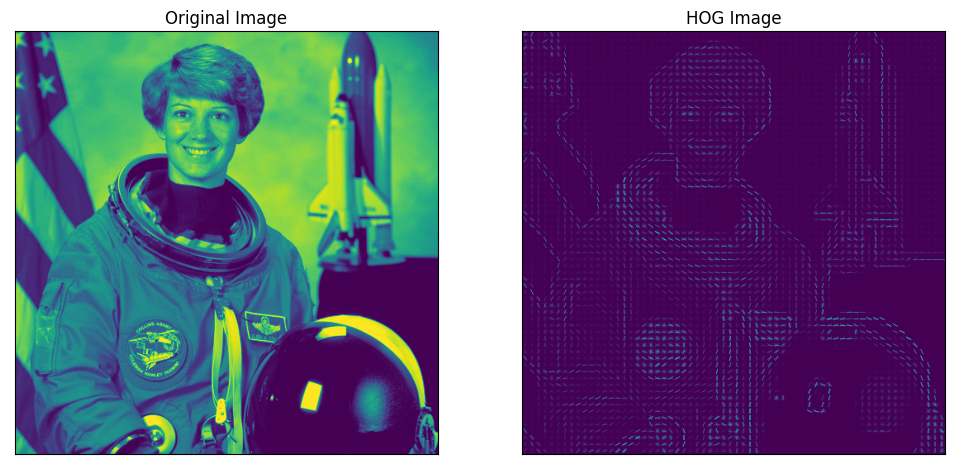

In [15]:
# Show the HOG features programatically

from skimage import data, feature
import matplotlib.pyplot as plt

# fetch an image of an astronaut
image = data.astronaut()

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#bins = orientations
hog_vector, hog_image = feature.hog(
    image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2', visualize=True)

print(hog_vector.shape)

figure, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(xticks=[], yticks=[]))  # remove ticks in the fiture
# figure, axes = plt.subplots(1, 2, figsize=(12, 6))

# let's plot the first image
axes[0].imshow(image)
axes[0].set_title("Original Image")

# show the HOG related image
axes[1].imshow(hog_image)
axes[1].set_title("HOG Image")

plt.show()

### HOG Face Detection

(10000, 62, 47)


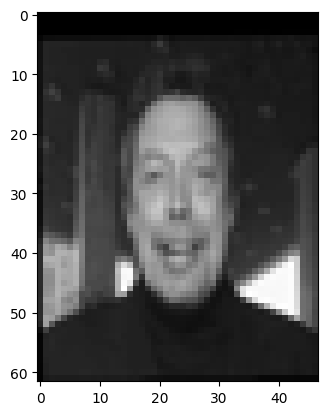

In [22]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

# we can load a data-set of human faces (positive samples)
human_faces = fetch_lfw_people()
positive_images = human_faces.images[:10000]
print(positive_images.shape)

plt.imshow(positive_images[0], cmap='gray')
plt.show()

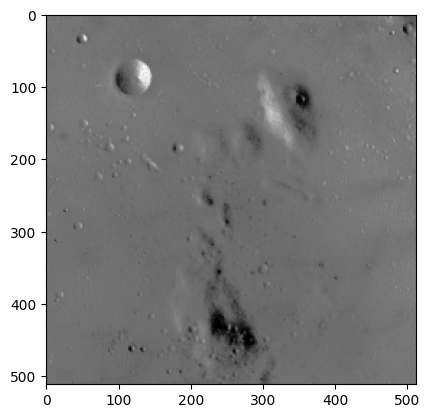

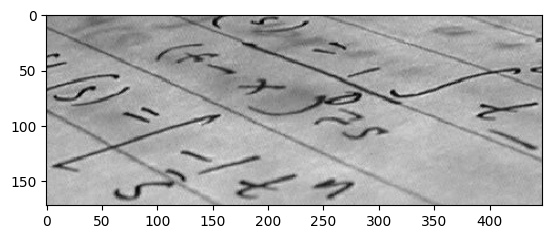

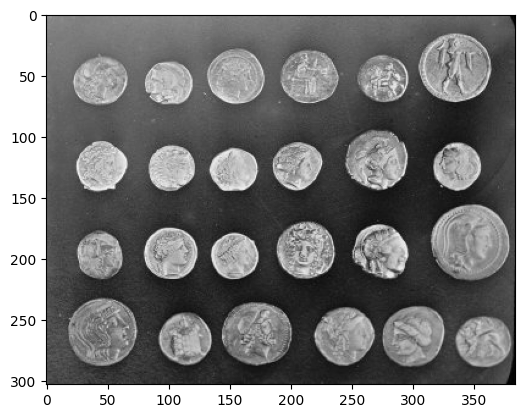

In [23]:
from skimage import data, feature, transform

non_face_topics = ['moon', 'text', 'coins']

negative_samples = [(getattr(data, name)()) for name in non_face_topics]

# data.coins(), data.moon(), or data.text()
for image in negative_samples:
    plt.imshow(image, cmap='gray')
    plt.show()

(3000, 62, 47)


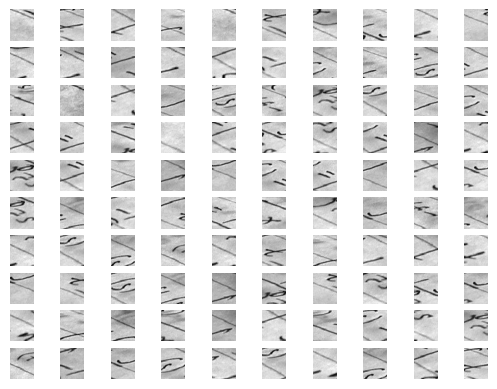

In [25]:
from sklearn.feature_extraction.image import PatchExtractor

def generate_random_samples(image, num_of_generated_images=100, patch_size=positive_images[0].shape):
    """ Generate several variants of input images"""

    extractor = PatchExtractor(patch_size=patch_size, max_patches=num_of_generated_images, random_state=42)
    patches = extractor.transform((image[np.newaxis]))
    return patches

# we generate 3000 samples (negative samples without a human face)
negative_images = np.vstack([generate_random_samples(im, 1000) for im in negative_samples])

print(negative_images.shape)

fig, ax = plt.subplots(10, 10)
for i, axis in enumerate(ax.flat):
   axis.imshow(negative_images[i], cmap='gray')  # 'moon'
   axis.imshow(negative_images[1000+i], cmap='gray')  # 'text'
   axis.axis('off')

In [26]:
from sklearn.svm import LinearSVC
from itertools import chain
import numpy as np

# we construct the training set with the output variables (labels)
# and of course we have to construct the HOG features
# TIME CONSUMING PROCEDURE !!!
X_train = np.array([feature.hog(image) for image in chain(positive_images, negative_images)])

# labels - 0 and 1 // 1: face 0: non-face
y_train = np.zeros(X_train.shape[0])
y_train[:positive_images.shape[0]] = 1

# we can construct the SVM
svm = LinearSVC()

# this is when SVM learns the parameters for the model based on the training dataset
svm.fit(X_train, y_train)

LinearSVC()

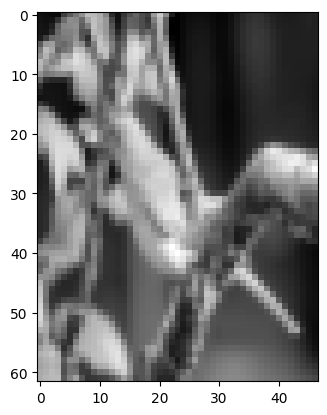

Prediction made by SVM: 0.000000


In [40]:
import cv2

# read the test images
test_image = cv2.imread(filename='DataCV/bird.jpg', flags=cv2.IMREAD_GRAYSCALE)
test_image = transform.resize(test_image, positive_images[0].shape)

plt.imshow(test_image, cmap='gray')
plt.show()

test_image_hog = np.array([feature.hog(test_image)])
prediction = svm.predict(test_image_hog)
print("Prediction made by SVM: %f" % prediction)

(62, 47)


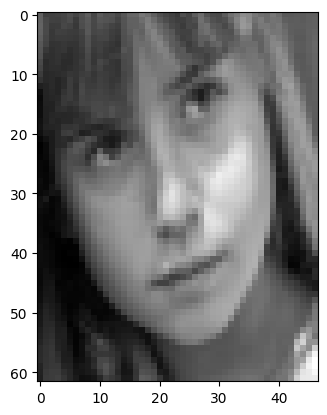

Prediction made by SVM: 1.000000


In [41]:
# read the test images
test_image = cv2.imread('DataCV/girl_face.png', cv2.IMREAD_GRAYSCALE)
print(positive_images[0].shape)
test_image = transform.resize(test_image, positive_images[0].shape)

plt.imshow(test_image, cmap='gray')
plt.show()

test_image_hog = np.array([feature.hog(test_image)])
prediction = svm.predict(test_image_hog)
print("Prediction made by SVM: %f" % prediction)

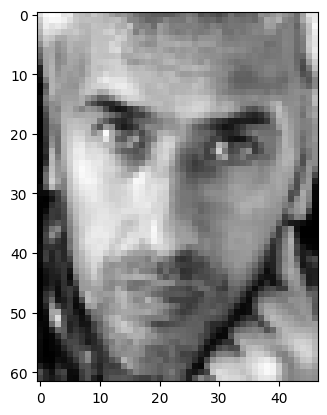

Prediction made by SVM: 0.000000


In [42]:
test_image = cv2.imread('DataCV/male_face.png', cv2.IMREAD_GRAYSCALE)
test_image = transform.resize(test_image, positive_images[0].shape)

plt.imshow(test_image, cmap='gray')
plt.show()

test_image_hog = np.array([feature.hog(test_image)])
prediction = svm.predict(test_image_hog)
print("Prediction made by SVM: %f" % prediction)

## 46. You Only Look Once: YOLO v3

In [23]:
import cv2

image = cv2.imread('DataCV/car_image.jpg')

cv2.imshow('YOLO Algorithm', image)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)  # for Mac

print(image.shape)

(450, 600, 3)


In [2]:
# there are 80 (90) possible output classes
# 0: person - 2: car - 5: bus
classes = ['car', 'person', 'bus']

# Load YoloV3 models in Darknet (Open Source Neural Network in C)
neural_network = cv2.dnn.readNetFromDarknet('cv_config/yolov3.cfg', 'cv_config/yolov3.weights')
# define whether we run the algorithm with CPU or with GPU
# WE ARE GOING TO USE CPU !!!
neural_network.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
neural_network.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [5]:
YOLO_IMAGE_SIZE = 320

# the image into a BLOB [0-1] RGB - BGR, BLOB (Binary Large Object)
blob = cv2.dnn.blobFromImage(image, 1 / 255, (YOLO_IMAGE_SIZE, YOLO_IMAGE_SIZE), True, crop=False)
print(blob.shape)

neural_network.setInput(blob)

# Display Yolo layers info
layer_names = neural_network.getLayerNames()
print(layer_names)

print(neural_network.getUnconnectedOutLayers())  # 200, 227, 254

# YOLO network has 3 output layer - note: these indexes are starting with 1
output_names = [layer_names[index - 1] for index in neural_network.getUnconnectedOutLayers()]
print(output_names)

(1, 3, 320, 320)
('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37',

In [22]:
outputs = neural_network.forward(output_names)

# first 5 parameters (x, y, w, h, conf) + 80 output classes in COCO dataset -> 85
print(outputs[0].shape)  # There are 300 predicted bounding boxes in outputs[0] - 85 is prediction factor
print(outputs[1].shape)  # 1200 predicted bounding boxes
print(outputs[2].shape)  # 4800 predicted bounding boxes
print(outputs[0][0].shape)
print(outputs[0][0])

print(outputs[0][1])


cv2.imshow('YOLO Algorithm', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)  # for Mac

(300, 85)
(1200, 85)
(4800, 85)
(85,)
[5.6673836e-02 4.6917621e-02 3.6925453e-01 2.1774814e-01 1.7430203e-09
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e

-1

In [18]:
import cv2
import numpy as np

# we are not going to bother with objects less than 30% probability
THRESHOLD = 0.3  # 0.3 is standard

# the lower the value: the fewer bounding boxes will remain
SUPPRESSION_THRESHOLD = 0.3
YOLO_IMAGE_SIZE = 320

# first 5 parameters (x, y, w, h, conf) + 80 output classes in COCO dataset
X, Y, W, H, CONF = (0, 1, 2, 3, 4)  # CONF is not used in this example

def find_objects(model_outputs):
    bounding_box_locations = []
    class_ids = []
    confidence_values = []

    for output in model_outputs:
        for prediction in output:
            class_probabilities = prediction[5:]  # last 80 values
            class_id = np.argmax(class_probabilities)
            # confidence is basically the probability of the detected object
            class_confidence = class_probabilities[class_id]

            if class_confidence > THRESHOLD:
                w, h = int(prediction[W] * YOLO_IMAGE_SIZE), int(prediction[H] * YOLO_IMAGE_SIZE)
                # the center of the bounding box (we should transform these values)
                x, y = int(prediction[X] * YOLO_IMAGE_SIZE - w / 2), int(prediction[Y] * YOLO_IMAGE_SIZE - h / 2)
                bounding_box_locations.append([x, y, w, h])
                class_ids.append(class_id)
                confidence_values.append(float(class_confidence))

    # Perform Non-Max Suppression
    box_indexes_to_keep = cv2.dnn.NMSBoxes(bounding_box_locations, confidence_values, THRESHOLD, SUPPRESSION_THRESHOLD)

    return box_indexes_to_keep, bounding_box_locations, class_ids, confidence_values


def show_detected_images(img, bounding_box_ids, all_bounding_boxes, class_ids, confidence_values, width_ratio,
                         height_ratio):
    for index in bounding_box_ids:
        bounding_box = all_bounding_boxes[index]
        x, y, w, h = int(bounding_box[0]), int(bounding_box[1]), int(bounding_box[2]), int(bounding_box[3])
        
        # we have to transform the locations adn coordinates because the resized image
        x = int(x * width_ratio)
        y = int(y * height_ratio)
        w = int(w * width_ratio)
        h = int(h * height_ratio)

        # OpenCV deals with BGR blue green red (255,0,0) then it is the blue color
        # we are not going to detect every objects just PERSON and CAR
        if class_ids[index] == 2:
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
            class_with_confidence = 'CAR' + str(int(confidence_values[index] * 100)) + '%'
            cv2.putText(img, class_with_confidence, (x, y-10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, (255, 0, 0), 1)

        if class_ids[index] == 0:
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
            class_with_confidence = 'PERSON' + str(int(confidence_values[index] * 100)) + '%'
            cv2.putText(img, class_with_confidence, (x, y-10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, (255, 0, 0), 1)

In [20]:
original_width, original_height = image.shape[1], image.shape[0]
predicted_objects, bbox_locations, class_label_ids, conf_values = find_objects(outputs)
show_detected_images(image, predicted_objects, bbox_locations, class_label_ids, conf_values,
                     original_width / YOLO_IMAGE_SIZE, original_height / YOLO_IMAGE_SIZE)

cv2.imshow('YOLO Algorithm', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)  # for Mac

-1

### YOLO v3 on Video

In [24]:
import cv2

YOLO_IMAGE_SIZE = 320
capture = cv2.VideoCapture('DataCV/yolo_test.mp4')

# there are 80 (90) possible output classes
# 0: person - 2: car - 5: bus
classes = ['car', 'person', 'bus']

neural_network = cv2.dnn.readNetFromDarknet('cv_config/yolov3.cfg', 'cv_config/yolov3.weights')
# define whether we run the algorithm with CPU or with GPU
# WE ARE GOING TO USE CPU !!!
neural_network.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
neural_network.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

while True:

    # after reading a frame (so basically one image) we just have to do
    # the same operations as with single images !!!
    frame_grabbed, frame = capture.read()

    if not frame_grabbed:
        break

    original_width, original_height = frame.shape[1], frame.shape[0]

    # the image into a BLOB [0-1] RGB - BGR
    blob = cv2.dnn.blobFromImage(frame, 1 / 255, (YOLO_IMAGE_SIZE, YOLO_IMAGE_SIZE), True, crop=False)
    neural_network.setInput(blob)

    layer_names = neural_network.getLayerNames()
    # YOLO network has 3 output layer - note: these indexes are starting with 1
    output_names = [layer_names[index - 1] for index in neural_network.getUnconnectedOutLayers()]

    outputs = neural_network.forward(output_names)
    predicted_objects, bbox_locations, class_label_ids, conf_values = find_objects(outputs)
    show_detected_images(frame, predicted_objects, bbox_locations, class_label_ids, conf_values,
                     original_width / YOLO_IMAGE_SIZE, original_height / YOLO_IMAGE_SIZE)

    cv2.imshow('YOLO Algorithm', frame)
    cv2.waitKey(1)

capture.release()
cv2.destroyAllWindows()
cv2.waitKey(1)  # for Mac

-1

## 48. Single Shot Detection (SSD)

In [25]:
# Utils for SSD

import cv2

# read the class labels
def construct_class_names(file_name='class_names'):
    with open(file_name, 'rt') as file:  # 'rt' : Read as Text
        names = file.read().rstrip('\n').split('\n')

    return names


def show_detected_objects(img, boxes_to_keep, all_bounding_boxes, object_names, class_ids):
    for index in boxes_to_keep:
        box = all_bounding_boxes[index]
        x, y, w, h = box[0], box[1], box[2], box[3]
        cv2.rectangle(img, (x, y), (x + w, y + h), color=(0, 255, 0), thickness=2)
        cv2.putText(img, object_names[class_ids[index] - 1].upper(), (box[0], box[1] - 10),
                    cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.7, (0, 255, 0), 1)

In [26]:
class_names = construct_class_names('cv_config/class_names')
print(type(class_names))
print(class_names)

<class 'list'>
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [17]:
import cv2
import numpy as np

# we are not going to bother with objects less than 50% probability
THRESHOLD = 0.4
# the lower the value: the fewer bounding boxes will remain
SUPPRESSION_THRESHOLD = 0.3
SSD_INPUT_SIZE = 320

def set_ssd(config_pb, config_pbtxt):    
    # VGG16 is heavy, so MobileNet 23x times smaller in size than VGG16
    neural_network = cv2.dnn_DetectionModel(config_pb, config_pbtxt)
    # define whether we run the algorithm with CPU or with GPU
    # WE ARE GOING TO USE CPU !!!
    neural_network.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
    neural_network.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

    neural_network.setInputSize(SSD_INPUT_SIZE, SSD_INPUT_SIZE)
    neural_network.setInputScale(1.0/127.5)
    neural_network.setInputMean((127.5, 127.5, 127.5))
    neural_network.setInputSwapRB(True)  # RGB -> BGR
    return neural_network

def run_ssd(ssd_model, frame):
    class_label_ids, confidences, bbox = ssd_model.detect(frame)
    bbox = list(bbox)
    confidences = np.array(confidences).reshape(1, -1).tolist()[0]  # array of array -> array

    # these are the indexes of the bounding boxes we have to keep
    box_to_keep = cv2.dnn.NMSBoxes(bbox, confidences, THRESHOLD, SUPPRESSION_THRESHOLD)

    show_detected_objects(frame, box_to_keep, bbox, class_names, class_label_ids)

In [19]:
import cv2
import numpy as np

capture = cv2.VideoCapture('DataCV/objects.mp4')

while True:

    is_grabbed, frame = capture.read()

    if not is_grabbed:
        break

    ssd_model = set_ssd('cv_config/ssd_weights.pb', 'cv_config/ssd_mobilenet_coco_cfg.pbtxt')
    run_ssd(ssd_model, frame)

    cv2.imshow('SSD Algorithm', frame)
    cv2.waitKey(1)

capture.release()
cv2.destroyAllWindows()
cv2.waitKey(1)  # for mac


-1